## Business Case

###### Develop a predictive model for inventory forecasting to help service centers maintain Just-In-Time (JIT) inventory standards, minimizing costs associated with spare parts while ensuring availability.

#### Importing Basic Libraries
- we will need the following libraries for data manipulation, analysis, and modeling:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

####  Loading the Data

In [2]:
# Define your database connection parameters
## Install pip install sqlalchemy & pip install pymysql to run below codes
username = 'dm_usdata_sql'
password = '37z<49REb&mKnl4AV!vJ'
domain_name = 'projects.datamites.com'
db_name = 'project_service_data'
table_name = 'service_data'

# Create a connection string
connection_string = f'mysql+pymysql://{username}:{password}@{domain_name}/{db_name}'

# Create a database engine
engine = create_engine(connection_string)

In [3]:
# Query the database and import the data into a Pandas DataFrame
df = pd.read_sql_table(table_name, engine)

In [4]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...,...,...,...
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL


In [5]:
# Display the first few rows of the DataFrame
print(df.head())

  invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220              50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                758            POLISH  
3       BAJAJ PULSAR NS 200                758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                758       COOLANT OIL  


#### Basic Checks

In [6]:
# Shape of the DataFrame
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (28482, 7)


In [7]:
# Columns in the DataFrame
print("Columns:", df.columns)

Columns: Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')


In [8]:
# Display the first few rows
print("Head of DataFrame:\n", df.head())

Head of DataFrame:
   invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220              50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                758            POLISH  
3       BAJAJ PULSAR NS 200                758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                758       COOLANT OIL  


In [9]:
# Display the last few rows
print("Tail of DataFrame:\n", df.tail())

Tail of DataFrame:
       invoice_date job_card_date business_partner_name  vehicle_no  \
28477     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28478     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28479     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28480     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   
28481     06-01-19      06-01-19        pravXXXXXXXXXX  KA53EVXXXX   

            vehicle_model current_km_reading invoice_line_text  
28477  BAJAJ DISCOVER 125              12805   SPROCKET RUBBER  
28478  BAJAJ DISCOVER 125              12805      CLUTCH CABLE  
28479  BAJAJ DISCOVER 125              12805        OIL FILTER  
28480  BAJAJ DISCOVER 125              12805          DISC OIL  
28481  BAJAJ DISCOVER 125              12805        AIR FILTER  


In [10]:
# DataFrame info
print("DataFrame Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  object
 6   invoice_line_text      28476 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB
DataFrame Info:
 None


In [11]:
# Descriptive statistics
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
        invoice_date job_card_date business_partner_name  vehicle_no  \
count         28482         28482                 28482       28482   
unique          555           553                  1010         846   
top        01-12-18      01-12-18        venkXXXXXXXXXX  KA53EVXXXX   
freq            179           179                   424        1313   

           vehicle_model current_km_reading invoice_line_text  
count              28482              28482             28476  
unique                28               3474               503  
top     BAJAJ PULSAR 150                  0        ENGINE OIL  
freq                8633                842              3802  


In [12]:
# Check the data types of each column
print(df.dtypes)

invoice_date             object
job_card_date            object
business_partner_name    object
vehicle_no               object
vehicle_model            object
current_km_reading       object
invoice_line_text        object
dtype: object


In [13]:
# Convert date columns to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d-%m-%y', errors='coerce')
df['job_card_date'] = pd.to_datetime(df['job_card_date'], format='%d-%m-%y', errors='coerce')

In [14]:
# Convert categorical columns to 'category' dtype
df['business_partner_name'] = df['business_partner_name'].astype('category')
df['vehicle_no'] = df['vehicle_no'].astype('category')
df['vehicle_model'] = df['vehicle_model'].astype('category')
df['invoice_line_text'] = df['invoice_line_text'].astype('category')

In [15]:
# Ensure Current KM Reading is float
df['current_km_reading'] = df['current_km_reading'].astype(float)

In [16]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL


#### EDA (Exploratory Data Analysis)

- Univariate Analysis: Analyze individual features (e.g., distribution of Current KM Reading).
  - 
Bivariate Analysis: Examine relationships between pairs of features (e.g., Invoice Date vs. Current KM Reading)

- Multivariate Analysis: Explore interactions among multiple features (e.g., using pair plots or correlation matrices).).

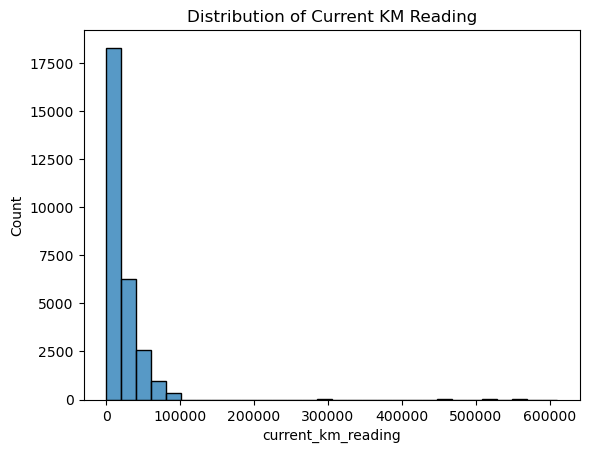

In [17]:
# Univariate analysis example
sns.histplot(df['current_km_reading'], bins=30)
plt.title('Distribution of Current KM Reading')
plt.show()

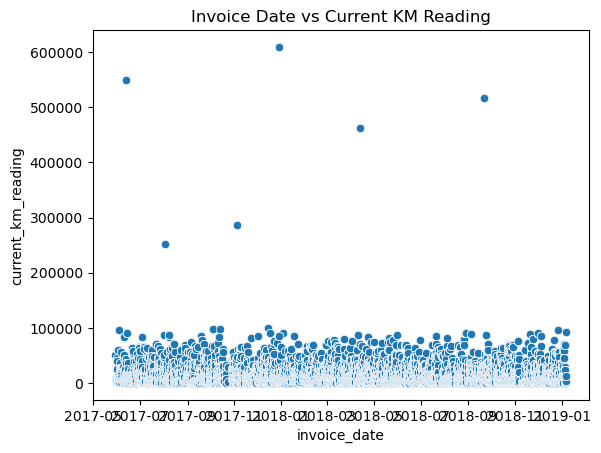

In [18]:
# Bivariate analysis example
sns.scatterplot(x='invoice_date', y='current_km_reading', data=df)
plt.title('Invoice Date vs Current KM Reading')
plt.show()

In [19]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
print(df.isnull().sum())

invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        6
dtype: int64


In [21]:
# Get the top 3 modes
top_modes = df['invoice_line_text'].mode().head(3)  # Get top 3 modes

# Fill missing values with the first mode if it appears more than once
if not top_modes.empty:
    # Use assignment instead of inplace
    df['invoice_line_text'] = df['invoice_line_text'].fillna(top_modes.iloc[0])

# Check for any remaining missing values
print("\nMissing Values After Filling with Top Mode:")
print(df.isnull().sum())


Missing Values After Filling with Top Mode:
invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64


In [22]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL


In [23]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
df['business_partner_name'] = encoder.fit_transform(df['business_partner_name'])
df['vehicle_no'] = encoder.fit_transform(df['vehicle_no'])
df['vehicle_model'] = encoder.fit_transform(df['vehicle_model'])
df['invoice_line_text'] = encoder.fit_transform(df['invoice_line_text'])

# Convert date columns to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['job_card_date'] = pd.to_datetime(df['job_card_date'])

# Convert dates to ordinal (numeric)
df['invoice_date'] = df['invoice_date'].apply(lambda x: x.toordinal())
df['job_card_date'] = df['job_card_date'].apply(lambda x: x.toordinal())

# Display the encoded DataFrame
print(df)

       invoice_date  job_card_date  business_partner_name  vehicle_no  \
0            736479         736479                    875         269   
1            736482         736480                    141         557   
2            736482         736480                    141         557   
3            736482         736480                    141         557   
4            736482         736480                    141         557   
...             ...            ...                    ...         ...   
28477        737065         737065                    758         560   
28478        737065         737065                    758         560   
28479        737065         737065                    758         560   
28480        737065         737065                    758         560   
28481        737065         737065                    758         560   

       vehicle_model  current_km_reading  invoice_line_text  
0                  2             50000.0                149  

In [24]:
df

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,736479,736479,875,269,2,50000.0,149
1,736482,736480,141,557,18,758.0,149
2,736482,736480,141,557,18,758.0,347
3,736482,736480,141,557,18,758.0,109
4,736482,736480,141,557,18,758.0,110
...,...,...,...,...,...,...,...
28477,737065,737065,758,560,7,12805.0,423
28478,737065,737065,758,560,7,12805.0,87
28479,737065,737065,758,560,7,12805.0,319
28480,737065,737065,758,560,7,12805.0,126


In [25]:
X = df.drop(['current_km_reading'], axis=1)
y = df['current_km_reading']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_lr = lr_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_lr)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 15186.849462590277
Mean Squared Error (MSE): 610335889.6831882
Root Mean Squared Error (RMSE): 24704.977022518928
R² Score: 0.05757850889257665


In [27]:
# 2. DecisionTree Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_dt = dt_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_dt)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 172.0407231876426
Mean Squared Error (MSE): 6301207.535545024
Root Mean Squared Error (RMSE): 2510.220614915156
R² Score: 0.9902702864081806


In [28]:
# 3.RandomForest Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_rf = rf_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_rf)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 504.4608132642912
Mean Squared Error (MSE): 4508601.153556974
Root Mean Squared Error (RMSE): 2123.3466870855013
R² Score: 0.9930382553381395


In [29]:
# 4. Support Vector Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_svr = svr_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_svr)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 15026.15073849201
Mean Squared Error (MSE): 694663744.844118
Root Mean Squared Error (RMSE): 26356.474438818976
R² Score: -0.07263238701902819


In [30]:
# 5. K-Neighbors Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_knn = knn_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = mean_squared_error(y_test, y_pred_knn, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_knn)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 10439.646656134808
Mean Squared Error (MSE): 414733993.559986
Root Mean Squared Error (RMSE): 20365.01886962018
R² Score: 0.359607987617077


In [31]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 4234.284959643771
Mean Squared Error (MSE): 42570852.27078264
Root Mean Squared Error (RMSE): 6524.634263373131
R² Score: 0.9342662184005432


In [32]:
# Initialize a list to store model performance metrics
results = []

# Function to evaluate model and store results
def evaluate_model(model, y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    })

# Evaluate each model
evaluate_model(lr_model, y_test, y_pred_lr, "Linear Regression")
evaluate_model(dt_model, y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(rf_model, y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(svr_model, y_test, y_pred_svr, "Support Vector Regressor")
evaluate_model(knn_model, y_test, y_pred_knn, "K-Neighbors Regressor")
evaluate_model(xgb_model, y_test, y_pred_xgb, "XGBoost Regressor")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                      Model           MAE           MSE          RMSE  \
0         Linear Regression  15186.849463  6.103359e+08  24704.977023   
1   Decision Tree Regressor    172.040723  6.301208e+06   2510.220615   
2   Random Forest Regressor    504.460813  4.508601e+06   2123.346687   
3  Support Vector Regressor  15026.150738  6.946637e+08  26356.474439   
4     K-Neighbors Regressor  10439.646656  4.147340e+08  20365.018870   
5         XGBoost Regressor   4234.284960  4.257085e+07   6524.634263   

   R² Score  
0  0.057579  
1  0.990270  
2  0.993038  
3 -0.072632  
4  0.359608  
5  0.934266  


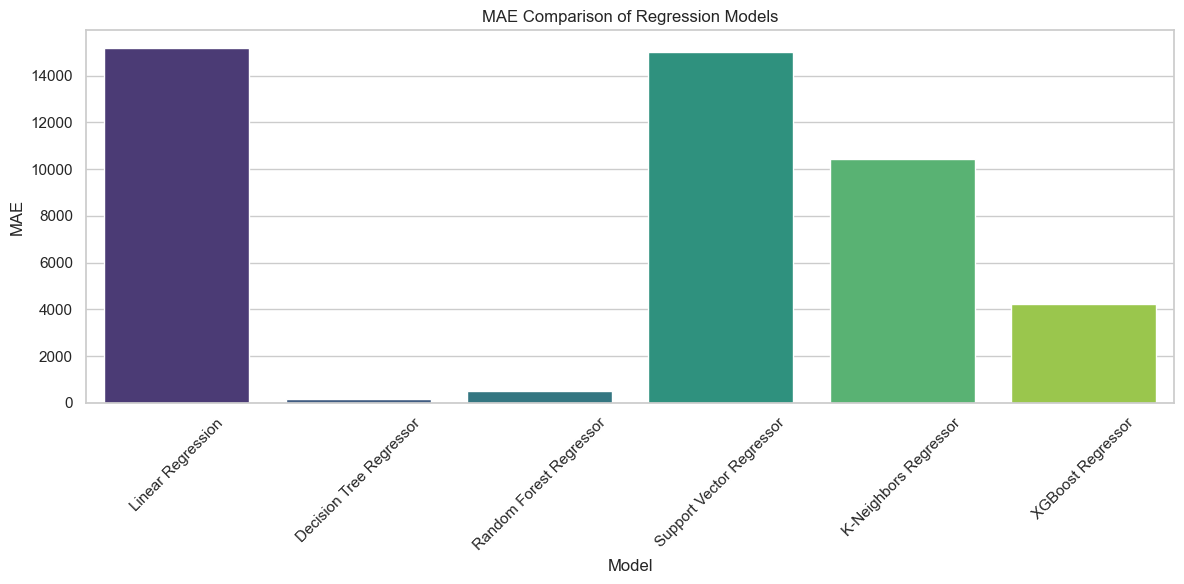

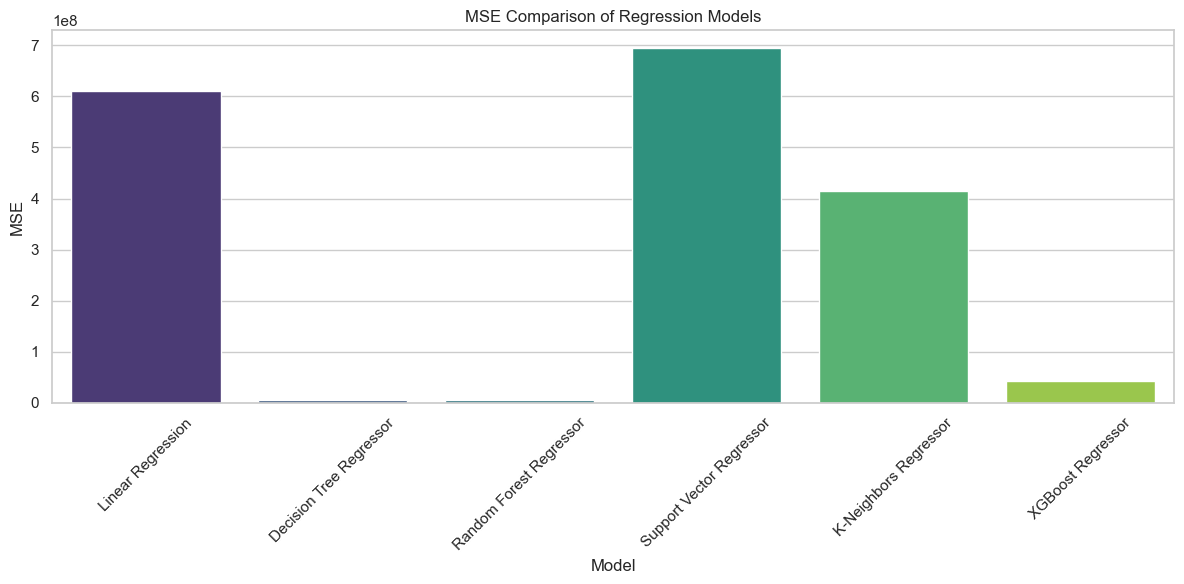

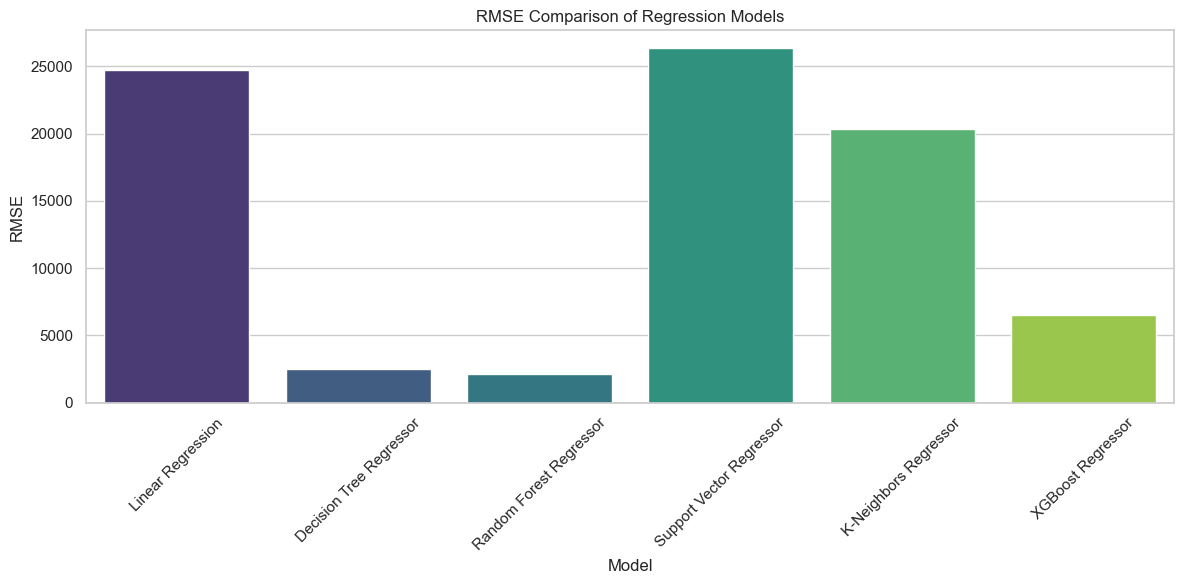

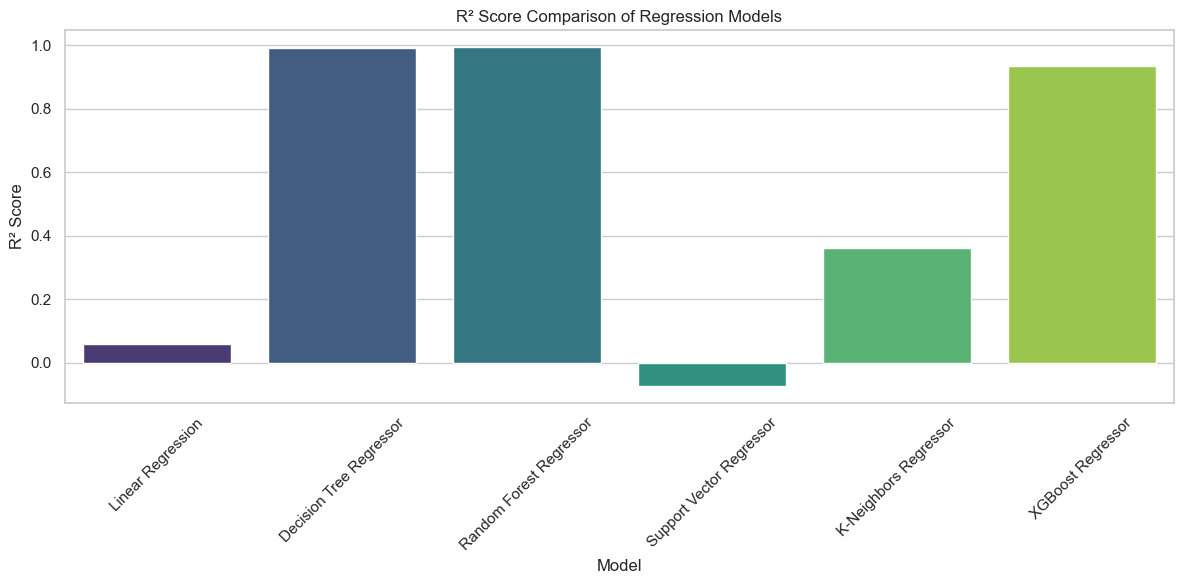

In [33]:
# Create a DataFrame with the results
results = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Support Vector Regressor',
        'K-Neighbors Regressor',
        'XGBoost Regressor'
    ],
    'MAE': [15186.849463, 172.040723, 504.460813, 15026.150738, 10439.646656, 4234.284960],
    'MSE': [6.103359e+08, 6.301208e+06, 4.508601e+06, 6.946637e+08, 4.147340e+08, 4.257085e+07],
    'RMSE': [24704.977023, 2510.220615, 2123.346687, 26356.474439, 20365.018870, 6524.634263],
    'R² Score': [0.057579, 0.990270, 0.993038, -0.072632, 0.359608, 0.934266]
}

results_df = pd.DataFrame(results)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a function to plot the metrics
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric_name, data=results_df, palette='viridis')
    plt.title(f'{metric_name} Comparison of Regression Models')
    plt.xticks(rotation=45)
    plt.ylabel(metric_name)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metrics('MAE')
plot_metrics('MSE')
plot_metrics('RMSE')
plot_metrics('R² Score')

#### Analysis on Model Comparison Report

- Mean Absolute Error (MAE): Lower values indicate better model performance.

     Best: Decision Tree Regressor (172.04)
  
     Worst: Linear Regression (15186.85)

- Mean Squared Error (MSE): Like MAE, lower values are better.

     Best: Random Forest Regressor (4508601.00)
  
     Worst: Linear Regression (610335855.88)

- Root Mean Squared Error (RMSE): Again, lower values are preferable.

     Best: Random Forest Regressor (2123.35)
  
     Worst: Support Vector Regressor (26356.47)

- R² Score: A higher score (closer to 1) indicates better fit of the model to the data. Negative values indicate that the model performs worse than a horizontal line (mean of the target variable).

     Best: Random Forest Regressor (0.9930)
  
     Worst: Support Vector Regressor (-0.0726)

#### Based on the metrics:

- The Random Forest Regressor stands out as the best-performing model overall, with the lowest MAE, MSE, RMSE, and the highest R² score.
  
- The Decision Tree Regressor also performs well, particularly in terms of MAE and R² score, but it is slightly worse than the Random Forest in terms of MSE and RMSE.
  
- The XGBoost Regressor shows good performance but is not as strong as the Random Forest.
  
- The Support Vector Regressor performed poorly across all metrics, indicating it is not suitable for this particular dataset.
  
#### Recommendation based the results:
we should consider using the Random Forest Regressor for your predictions, as it provides the best overall performance based on the metrics evaluated. Additionally, it might be worth exploring hyperparameter tuning for the Random Forest model to see if you can further improve its performance.

In [37]:
## pip install joblib

# Saving the Model

import pickle

# Save the Random Forest model using pickle
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Random Forest Regressor model saved as 'random_forest_regressor.pkl'")

Random Forest Regressor model saved as 'random_forest_regressor.pkl'
